In [1]:
# import visualization and data processing libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Support Vector Machines

$$\frac{1}{2}\|w\|^2 + C\sum_{i=1}^l\xi_i \to \min_{w, b}\\
y_i(w^Tx_i + b) \geq 1 - \xi_i\\
\xi_i \geq 0$$

#### Equivalent
$$ \frac{1}{2}\|w\|^2 + C\sum_{i=1}^l h(\hat{y}_i, y_i)$$



Where:
$$h(\hat{y}_i, y_i) = \max(0, 1 - y_i\hat{y}_i)$$


$$ \hat{y}_i = (w, x_i) + b$$

### SVM as a Risk Minimization Problem

$$ \frac{1}{2}\|w\|^2 + C\sum_{i=1}^l h(\hat{y}_i, y_i)$$



* $h(\hat{y}_i, y_i)$ -- emprirical risk

* $\frac{1}{2} \|w\|^2$ - regularization

### Let's Classify Something

In [2]:
# Automated data loading and feature preprocessing routines
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris

Out of box sklearn supports various techniques for data preprocessing.

http://scikit-learn.org/stable/modules/preprocessing.html

In [3]:
X, y = load_iris(return_X_y=True)
X_train_non_normalized = X[-100:, [1, 2]]
y_train = y[-100:]
# SVM take data with -1 and 1 labels
y_train[y_train == 1] = 1
y_train[y_train == 2] = -1
# Scale input X
X_train = scale(X_train_non_normalized)
# Some general info
n_dim = X_train.shape[1]
n_elements = X.shape[0]

![title](http://5047-presscdn.pagely.netdna-cdn.com/wp-content/uploads/2015/04/iris_petal_sepal.png)

### Let's Classify Something

Text(0,0.5,'petal width (cm)')

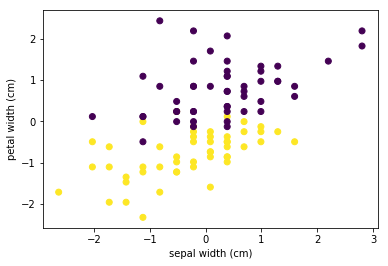

In [4]:
axis = plt.gca()
axis.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
axis.set_xlabel('sepal width (cm)')
axis.set_ylabel('petal width (cm)')

### Gradient Descent 

We can use simple gradient descent

![title](https://qph.ec.quoracdn.net/main-qimg-4f535a48019fa697d74e8658b692097a)

In [5]:
def calculate_hinge_loss(X, y, w, b, C=1):
    '''Calculate hinge loss function
    :param: X -- numpy array of shape l x n
    :param: y -- numpy array of shape l with values 1 and -1
    :param: w -- numpy array of shape n
    :param: b -- np.float64
    '''
    loss = 0
    # Calculate Loss
    predictions = X @ w + b
    elementwise_loss = np.maximum(0, 1 - y*predictions)
    loss = C*elementwise_loss.sum() + 0.5*np.sum(w * w)
    
    w_grad = np.zeros_like(w)
    b_grad = 0
    # Calculate Gradient for hinge loss
    suspicion_predictions = elementwise_loss > 0
    suspicion_indices = suspicion_predictions.nonzero()[0]
    w_grad = -(X * y[:, None])[suspicion_predictions, :].sum(axis=0) * C + w
    b_grad = -np.sum(y[suspicion_indices]) * C
    
    return loss, w_grad, b_grad

In [6]:
step = 1e-5
tolerance = 1e-5
converged = False
C = 100
index = 0

training_loss_history = []
training_loss_iteration = []

# Initialization
w = np.zeros(n_dim)
b = 0

#Initial gradient
loss, w_grad, b_grad = calculate_hinge_loss(X_train, y_train, w, b, C)
while not converged:
    # Update parameters
    new_w = w - step * w_grad
    new_b = b - step * b_grad
    # Calculate new loss and gradient
    new_loss, w_grad, b_grad = calculate_hinge_loss(X_train, 
                                                    y_train, 
                                                    new_w, new_b, C)
    # Check convergence
    if np.abs(loss - new_loss) < tolerance:
        converged = True
    
    b, w, loss = new_b, new_w, new_loss
    
    # Update history
    index+=1
    if index % 10 == 0:
        training_loss_history.append(new_loss)
        training_loss_iteration.append(index)

### Learning History

Text(0,0.5,'Loss Value')

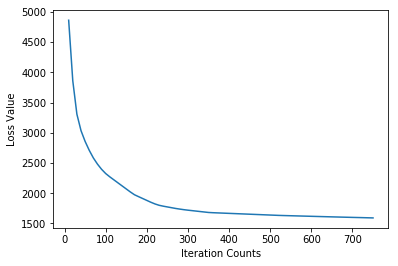

In [7]:
plt.plot(training_loss_iteration, training_loss_history)
plt.xlabel('Iteration Counts')
plt.ylabel('Loss Value')

In [8]:
# In order to visualize results we generate
# all possible pairs of (x, y) on a grid
grid_x = np.linspace(-3, 3, 100)
grid_y = np.linspace(-3, 3, 100)
XX, YY = np.meshgrid(grid_x, grid_y)
grid_test_x = np.c_[XX.ravel(), YY.ravel()]

### Plot Decision Value

In [9]:
predictions_primal = grid_test_x @ w + b

In [10]:
def plot_prediction_on_grid(predictions, axis):
    '''Plots results on a grid
    :param: predictions -- numpy array with predictions on grid_test_x
    :param: axis -- current axis'''
    # visualize decision function value with color
    CS = axis.contourf(grid_x, grid_y, predictions.reshape(XX.shape))
    # plots separating line
    axis.contour(grid_x, grid_y, predictions.reshape(XX.shape), colors=['k', 'k', 'k'],
                linestyles=['--', '-', '--'], levels=[-.1, 0, .1], linewidths=2)
    # Plot dataset
    axis.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
    # Add colorbar to axis
    plt.colorbar(CS, ax=axis)
    axis.set_xlabel('sepal width (cm)')
    axis.set_ylabel('petal width (cm)')

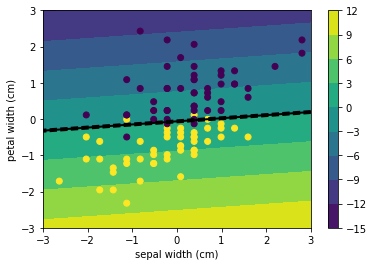

In [11]:
ax = plt.gca()
plot_prediction_on_grid(predictions_primal, ax)

### SVM Dual Problem
$$ \frac{1}{2}(\alpha * y)^T K (\alpha * y) - \sum\alpha \to \min_{\alpha}\\
\sum y * \alpha = 0\\
0 \leq \alpha \leq C$$

### Quadtratic Optimization Problem
$$\frac{1}{2}x^T P x + q^T x \to \min_{x}\\
G x \leq h\\
Ax = b$$

Now we are going to use cvxopt library which produce solvers for different kind of optimization problems.

http://cvxopt.org/

In the next cell we are going to install cvxopt. In case of any problem please ask TAs for help.

In [12]:
!conda install cvxopt --yes

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.4.7
  latest version: 4.4.8

Please update conda by running

    $ conda update -n base conda



# All requested packages already installed.



For more information about different types of optimization problem you can check this presentations. This material could be helpful however is not necessary for understatnding this course in Machine Learning

http://ee364a.stanford.edu/lectures/problems.pdf

### Reformulate Problem

In [13]:
from cvxopt import matrix

# all values should be of cvxopt.matrix datatype
# you can just use matrix(a) where a is np.array

def formulate_problem(X, y, kernel, C):
    """Formulate quadratic optimization
    problem by defining matrices
    :param: X np.array of size n_elem * n_dim with reaining values
    :param: y np.array of size n_elem with labels 1 and -1
    :kernel: kernel function wich accept two matrices of objects"""
    quadratic_problem = {}
    P = kernel(X, X) * (y[:, None] @ y[None, :])
    quadratic_problem['P'] = matrix(P)
    quadratic_problem['q'] = -matrix(np.ones_like(y, dtype=float).reshape(-1, 1))
    quadratic_problem['A'] = matrix(y.reshape(1, -1))
    quadratic_problem['b'] = matrix(0.0)
    G = np.block([[-np.eye(len(y), dtype=float)], [np.eye(len(y), dtype=float)]])
    quadratic_problem['G'] = matrix(G)
    h = np.zeros(2 * len(y))
    h[len(y):] = C
    quadratic_problem['h'] = matrix(h)
    return quadratic_problem

### Check the Results

In [14]:
# Optimization routine
from cvxopt.solvers import qp
# Kernel function
from sklearn.metrics.pairwise import linear_kernel

In [ ]:
kernel = linear_kernel # Function is an object

qudratic_problem = formulate_problem(X_train, y_train.astype(float), kernel, C)
results = qp(**qudratic_problem)

Extract results and round small values

In [17]:
optimal_alpha = np.array(results['x']).ravel()

### Prediction

Having a kernel function $K$ and optimal $\alpha$ compute a dot product $(w\cdot x_i)$:

$$(w \cdot x_{test}) = \sum_{i=1}^l\alpha_i y_i K(x_i, x_{test})$$

In [18]:
def kernel_dot_product(X_train, y_train, X_test, kernel, alpha):
    '''Calculate scalar product with vector w
    based on support vectors and dual coefficients
    :param: X_train np.array with train data
    :param: y_train np.array with train labels
    :param: X_test np.array with test data
    :parma: kernel kernel function
    :param: alpha dual coefficients'''
    
    prediction = np.zeros(X_test.shape[0])
    # Your code here
    kernel_matrix = kernel(X_train, X_test)
    prediction = (y_train * alpha).reshape(1, -1) @ kernel_matrix
    return prediction.ravel()

### Prediction

Having a kernel function $K$ and optimal $\alpha$ compute a dot product $(w\cdot x_i)$:

$$(w \cdot x_{test}) = \sum_{i=1}^l\alpha_i y_i K(x_i, x_{test})$$

### Constant Calculation

We can get constant $b$ based on support vectors' properties

$$ b = y_i - (w \cdot x_i)\\
0 < \alpha_i < C$$

In [19]:
def calculate_bias(X_train, y_train, kernel, alpha):
    """Calculates the bias 
    :param: X_train np.array with train data
    :param: y_train np.array with train labels
    :parma: kernel kernel function
    :param: alpha dual coefficients'''
    """
    # Search for support element index
    support_index = -1
    for index, alpha in enumerate(alpha):
        if 0 < alpha < C:
            support_index = index
            break

    # Calculate dot produt
    dot_product = kernel_dot_product(X_train, y_train, 
                                     X_train[[support_index], :], 
                                     kernel, alpha)
    # Calculate bias
    b = y_train[support_index] - dot_product
    return b

In [20]:
b = calculate_bias(X_train, y_train, kernel, optimal_alpha)

### Plot the Results

In [24]:
predictions_dual = kernel_dot_product(X_train, y_train, 
                                      grid_test_x, kernel, 
                                      optimal_alpha) + b

Text(0.5,1,'Primal')

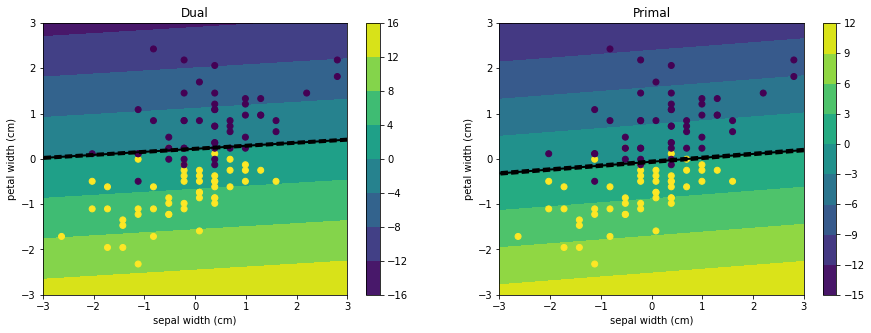

In [25]:
figure, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(15, 5)
plot_prediction_on_grid(predictions_dual, ax1)
ax1.set_title('Dual')
plot_prediction_on_grid(predictions_primal, ax2)
ax2.set_title('Primal')

### Lets Try Gaussian Kernel

![title](https://jamesmccaffrey.files.wordpress.com/2014/01/gaussiankernel.jpg)

### Lets Try Gaussian Kernel

$$K(x, y) = \exp{\left(-\gamma \cdot \|x - y\|^2\right)}$$

In [26]:
# Importing gaussian kernel
from sklearn.metrics.pairwise import rbf_kernel
# Some helper function for getting kernel function
from functools import partial

In [ ]:
# Fix parameter gamma
kernel = partial(rbf_kernel, gamma=0.1)

qudratic_problem = formulate_problem(X_train, y_train.astype(float), kernel, C)
results = qp(**qudratic_problem)

In [28]:
optimal_alpha = np.array(results['x']).ravel()

In [29]:
b = calculate_bias(X_train, y_train, kernel, optimal_alpha)

### Plot Predictions

In [30]:
# Calculate decision function
predictions_dual = kernel_dot_product(X_train, y_train, 
                                     grid_test_x, kernel, 
                                     optimal_alpha) + b

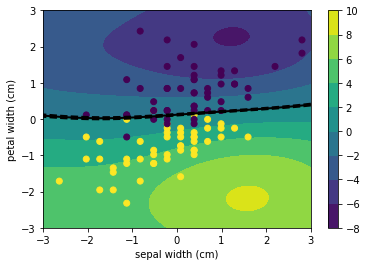

In [31]:
plot_prediction_on_grid(predictions_dual, plt.gca())

### Kernels

We can explicetly define feature mapping. If we define function $K(x, y)$

Which is:

* Symmetric
* Positevly defined


It can be defined not only on vectors

There are kernels for graphs, textes, etc.

### Explicit Mapping

$$K(x, y) = (x^Ty + 1)^2$$

In case of $x, y \in R^2$:


$$K(x, y) = (x_1 \cdot y_1 + x_2 \cdot y_2 + 1)^2$$

$$K(x, y) = x_1^2 \cdot y_1^2 + x^2_2 \cdot y_2^2 + \sqrt{2}x_1\cdot \sqrt{2}y_1 + \sqrt{2}x_2 \cdot \sqrt{2}y_2 + \sqrt{2}x_1x_2 \cdot \sqrt{2}y_1y_2 + 1 \cdot 1$$

$$K(x, y) = \phi(x) \cdot \phi(y)$$

Explicit mapping:
$$\phi(x) = \phi(x_1, x_2) = (x_1^2, x_2^2, \sqrt{2}x_1, \sqrt{2}x_2, \sqrt{2}x_1 x_2, 1)$$

### Kernel vs. Explicit Mapping

Let's try to compare kernel svm and exact mapping

Explicit mapping:
$$\phi(x) = \phi(x_1, x_2) = (x_1^2, x_2^2, \sqrt{2}x_1, \sqrt{2}x_2, \sqrt{2}x_1 x_2, 1)$$

In [32]:
def poly_features_extraction(X):
    quadratic = X ** 2
    linear = np.sqrt(2) * X
    pairwise = np.sqrt(2) * X.prod(axis=1).reshape((-1, 1))
    constant = np.ones((len(X), 1))
    poly_features = np.hstack([quadratic,
                               linear,
                               pairwise,
                               constant])
    return poly_features

In [33]:
# Support vector classifier import
from sklearn.svm import SVC

For more info check documentation and examples

http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

http://scikit-learn.org/stable/modules/svm.html

### Test Explicit Mapping

In [34]:
# Polynomial Kernel
model_kernel = SVC(kernel='poly', degree=2, coef0=1)
model_kernel.fit(X_train, y_train)
prediction_kernel = model_kernel.decision_function(grid_test_x)

In [35]:
# Explicit mapping
poly_features_train = poly_features_extraction(X_train)
model_explicit = SVC(kernel='linear')
model_explicit.fit(poly_features_train, y_train)

poly_features_test = poly_features_extraction(grid_test_x)
prediction_explicit = model_explicit.decision_function(poly_features_test)

### Plot the Results

Text(0.5,1,'Explicit Mapping')

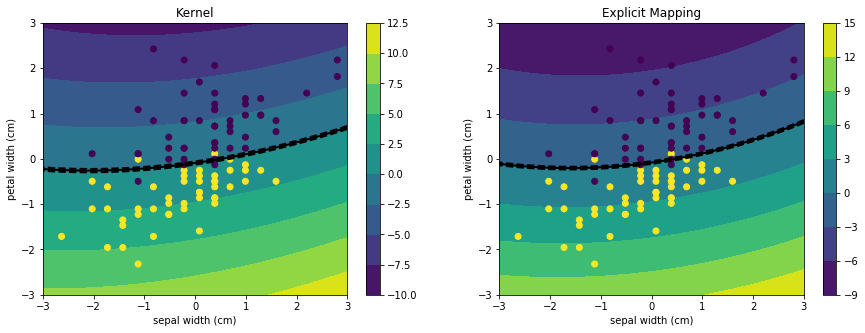

In [36]:
figure, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches((15, 5))
plot_prediction_on_grid(prediction_kernel, ax1)
ax1.set_title('Kernel')
plot_prediction_on_grid(prediction_explicit, ax2)
ax2.set_title('Explicit Mapping')

### Why Kernels?


* Initial $x$ from $R^n$. Dimensions of feature space with polynomial kernel of degree 2?

* Dimensions grows as $n^2$

* Some kernels represent infinite dimensions space

* It's possible to define kernel for non numerical objects like graphs or texts

### Linear vs. Kernel

##### Linear
* Fast to compute
* Robust
* Require explicit feature extraction

##### Kernel
* Qudratic-Cubic time to compute
* Robustness depend on kernel type
* Suitable even for nonnumrical data